# <font color=maroon> Classroom assignments 2 例程 </font>  

构建信号  
$$  
x_{a}(t)=sin(2\pi*150t)+sin(2\pi*3250t)+sin(2\pi*400t)  
$$  
并用  
$$  
f_{s1}=680Hz,f_{s2}=900Hz,f_{s3}=1000Hz  
$$  
的采样频率对$x_{a}(t)$进行采样，分别画出时域信号和频域信号波形。

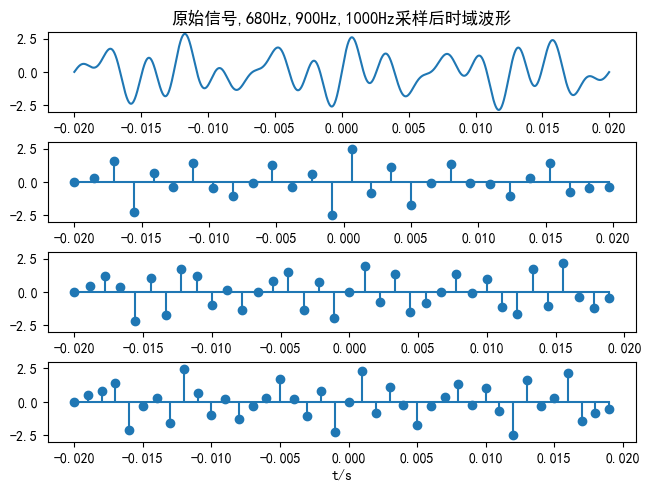

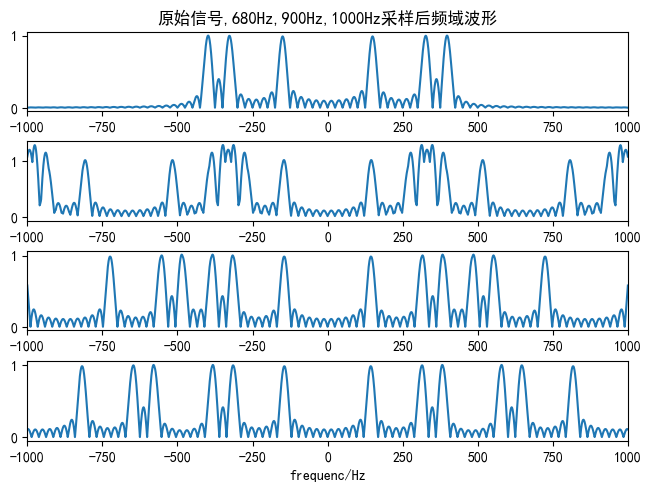

In [22]:
#导入使用的库
import numpy as np;from math import *
from scipy import fft
import matplotlib.pyplot as plt

def signfunc(f): #定义信号函数
    f1 = 150;f2 = 325;f3 = 400
    t = np.arange(-0.02,0.02,1/f)
    return t,np.sin(2*pi*f1*t)+np.sin(2*pi*f2*t)+np.sin(2*pi*f3*t)

#原始信号
fa = 100000;ta,xa = signfunc(fa);N = len(xa)
N0 = N*500
He_a = np.abs(fft.fft(xa,N0));He_a = He_a/np.max(He_a) #原始信号的频谱
freq_a = fft.fftfreq(N0,1/fa)
He_a = fft.fftshift(He_a);freq_a = fft.fftshift(freq_a)

def samp_spec(f_samp,f_anal,He,m): #定义采样后的频谱合成函数
    N = len(He);M = int((f_samp*N/f_anal)*(m-1)+N) #合成频谱的长度
    He_retn = np.append(He,np.zeros(M-N))
    for i in range(m-1):
        N_fron = int((f_samp*N/f_anal)*(i+1))
        He_fron = np.zeros(N_fron)
        He_midd = np.append(He_fron,He)
        He_back = np.zeros(M-N_fron-N)
        He_shift = np.append(He_midd,He_back)
        He_retn = He_retn+He_shift
    freq = fft.fftfreq(M,1/f_anal)
    freq = fft.fftshift(freq)
    return freq,He_retn

#对原始信号进行采样
fs1 = 680;fs2 = 900;fs3 = 1000;m = 5 #频谱搬移次数
t1,x_hat1 = signfunc(fs1);t2,x_hat2 = signfunc(fs2);t3,x_hat3 = signfunc(fs3)
freq1,He1 = samp_spec(fs1,fa,He_a,m);freq2,He2 = samp_spec(fs2,fa,He_a,m)
freq3,He3 = samp_spec(fs3,fa,He_a,m)

#绘制原信号及各采样信号的时域波形
fig,ax = plt.subplots(4,1,constrained_layout=True)
ax[0].plot(ta,xa);ax[1].stem(t1,x_hat1,basefmt="")
ax[2].stem(t2,x_hat2,basefmt="");ax[3].stem(t3,x_hat3,basefmt="")
ax[0].set_ylim([-3,3]);ax[1].set_ylim([-3,3])
ax[2].set_ylim([-3,3]);ax[3].set_ylim([-3,3])
ax[0].set_title('原始信号,680Hz,900Hz,1000Hz采样后时域波形')
ax[3].set_xlabel('t/s')
fig.savefig('./freq_samp1.png',dpi=500)

#绘制原信号及各采样信号的幅度响应
fig,ax = plt.subplots(4,1,constrained_layout=True)
ax[0].plot(freq_a,He_a);ax[1].plot(freq1,He1)
ax[2].plot(freq2,He2);ax[3].plot(freq3,He3)
ax[0].set_xlim([-1000,1000]);ax[1].set_xlim([-1000,1000]);
ax[2].set_xlim([-1000,1000]);ax[3].set_xlim([-1000,1000]);
ax[0].set_title('原始信号,680Hz,900Hz,1000Hz采样后频域波形')
ax[3].set_xlabel('frequenc/Hz')
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来显示负号
fig.savefig('./freq_samp2.png',dpi=500)

# <font color=maroon> Classroom assignments 2</font>  
参考上面例程，对$1Hz$和$2Hz$正弦波叠加信号进行$8Hz$采样，采用$Matlab$和$Python$编程实现信号采样和内插恢复，并比较原信号和恢复后信号。

### DSP Assignment 2
> 1120211851温梓阳

- 导入必要的库

In [23]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import fft

- 构建1Hz和2Hz正弦波叠加信号

$$x(t)=sin(2\pi t)+sin(2\pi * 2t)$$

In [24]:
def signal_generate(f):
    t = np.arange(-2,2,1/f)
    s = np.sin(2*np.pi*t)+np.sin(2*np.pi*2*t)
    return t,s

fa = 10000
source_t, source = signal_generate(fa)

- 绘制信号时域频域波形

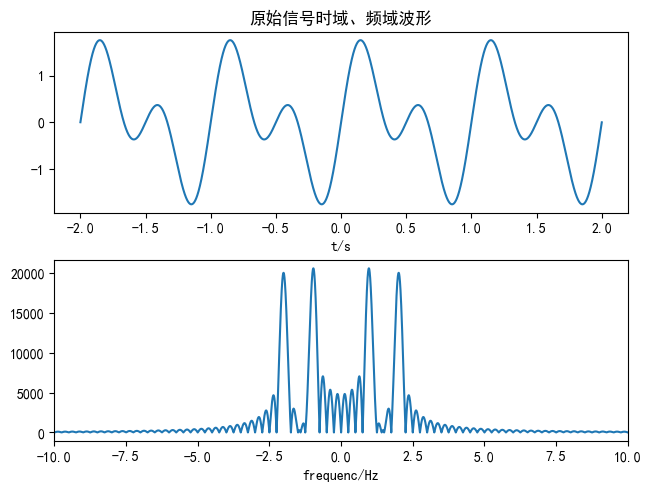

In [25]:
N = len(source)
N0 = N*500
source_freq = fft.fftfreq(N0,1/fa)
source_h = np.abs(fft.fft(source,N0))
source_freq = fft.fftshift(source_freq)
source_h = fft.fftshift(source_h)

fig,ax = plt.subplots(2,1,constrained_layout=True)
ax[0].plot(source_t,source)
ax[1].plot(source_freq,source_h)
ax[1].set_xlim([-10,10])
ax[0].set_title('原始信号时域、频域波形')
ax[0].set_xlabel('t/s')
ax[1].set_xlabel('frequenc/Hz')
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来显示负号


- 8Hz采样后

16000.0 20000000


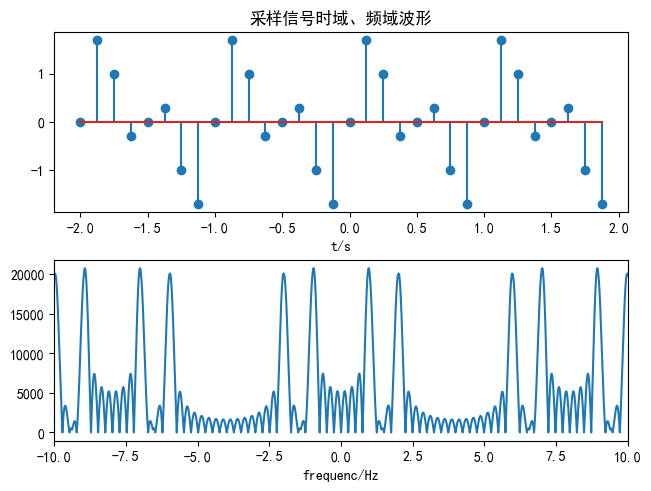

In [26]:
signal_t ,signal_8hz = signal_generate(8)
def samp_spec(f_samp,f_anal,He,m): #定义采样后的频谱合成函数
    N = len(He);M = int((f_samp*N/f_anal)*(m-1)+N) #合成频谱的长度
    print(f_samp*N/f_anal,N)
    He_retn = np.append(He,np.zeros(M-N))
    for i in range(m-1):
        N_fron = int((f_samp*N/f_anal)*(i+1))
        He_fron = np.zeros(N_fron)
        He_midd = np.append(He_fron,He)
        He_back = np.zeros(M-N_fron-N)
        He_shift = np.append(He_midd,He_back)
        He_retn = He_retn+He_shift
    freq = fft.fftfreq(M,1/f_anal)
    freq = fft.fftshift(freq)
    return freq,He_retn
freq,He1 = samp_spec(8,fa,source_h,5)
fig,ax = plt.subplots(2,1,constrained_layout=True)
ax[0].stem(signal_t,signal_8hz)
ax[1].plot(freq,He1)
ax[1].set_xlim([-10,10])
ax[0].set_title('采样信号时域、频域波形')
ax[0].set_xlabel('t/s')
ax[1].set_xlabel('frequenc/Hz')
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来显示负号

- 插值还原信号

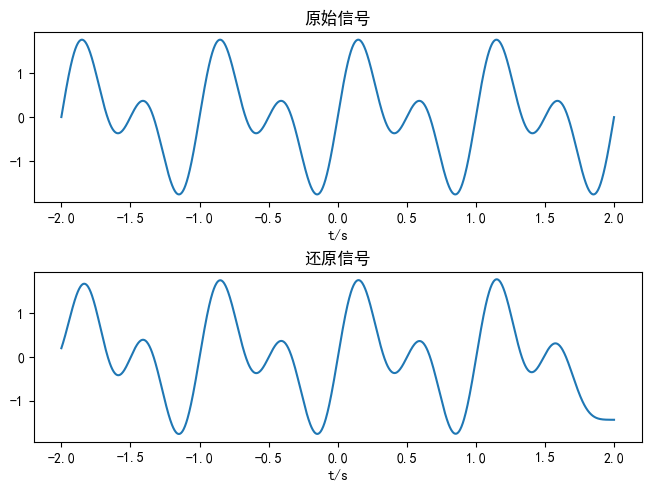

In [27]:
from scipy import signal
num = 40
t_1 = np.arange(-2,2,1/(num*8))        # 时间插点
x_1 = np.zeros(len(signal_t)*num)      # 采样插0
for i in range(0,len(x_1),num):
    x_1[i] = signal_8hz[i//num]        # 采样数据放进去
b, a = signal.butter(8,6/(num*8),'lowpass')    # 巴特沃兹滤波器（八阶）
x_1_f = signal.filtfilt(b, a, x_1)            # 滤波得到信号
fig,ax = plt.subplots(2,1,constrained_layout=True)
ax[0].plot(source_t,source)
ax[1].plot(t_1,x_1_f*40)               # 还原幅值
ax[0].set_title('原始信号')
ax[0].set_xlabel('t/s')
ax[1].set_title('还原信号')
ax[1].set_xlabel('t/s')
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来显示负号

- FFT方法尝试（失败版）

可以看到0坐标右侧确实出现了图像但是其幅值在衰减，但在MATLAB中并未出现此种现象（比较奇怪）

c:\Users\13160\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-20.0, 20.0)

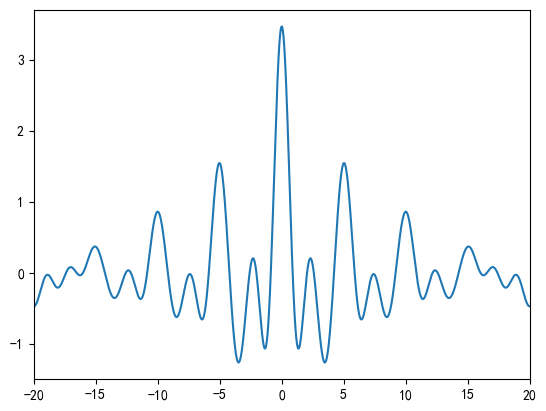

In [28]:
pos = np.where(freq>=-3)[0][0]      # 低通滤波
filted = np.append(np.append(np.zeros(pos),He1[pos:len(He1)-pos]),np.zeros(pos))
He1_ifft = fft.ifftshift(fft.ifft(fft.ifftshift(filted)))   # ifft
plt.plot(freq,He1_ifft)
plt.xlim([-20,20])

附：MATLAB代码
```R

fs = 8; %Hz 
f1 = 1;  %Hz
f2 = 2;  %Hz
dt = 0.001; %仿真步长：0.001s
t = -2:dt:2; %仿真时长：2s

figure(1);
%信号
xt = sin(2*pi*f1*t) + sin(2*pi*f2*t); 
subplot(2,1,1);plot(t,xt);xlim([-2 2]);ylim([-2 2]);
xlabel('时间 s');ylabel('幅值');title('信号x(t)');

%8Hz采样
subplot(2,1,2);
t_sample = -2:1/fs:2;
x_sample = sin(2*pi*f1*t_sample) + sin(2*pi*f2*t_sample);
stem(t_sample,x_sample);
xlabel('时间 s');ylabel('幅值');title('采样x(t)');

figure(2);
%原始信号FFT
yt = fftshift(fft(xt,1/dt*100));
ly = length(yt);
ft = (-ly/2:ly/2-1)/ly*1/dt;
subplot(2,1,1);
plot(ft,abs(yt));
xlim([-10,10]);
xlabel('频率 Hz');ylabel('幅值');title('信号x(t)');

%采样信号混叠
m = 5;
N = length(yt);
M = (fs*N*dt)*(m-1)+N;
Mixed = [yt,zeros(1,M-N)];
for i=1:m-1
    front = zeros(1,i*(fs*N*dt));
    tail = zeros(1,M-N-i*(fs*N*dt));
    Add = [front,yt,tail];
    Mixed = Mixed + Add;
end
lmixed = length(Mixed);
fmixed = (-lmixed/2:lmixed/2-1)/lmixed*1/dt;
subplot(2,1,2);
plot(fmixed,abs(Mixed));
xlim([-10,10]);
xlabel('频率 Hz');ylabel('幅值');title('信号x(t)');

figure(3);
N = length(x_sample);
num = 8;
x_expand = zeros(1,N*num);
t_expand = -2.06:1/num/fs:2.06;
for i = 1:N
    x_expand(i*8) = x_sample(i);
end

figure(4);
pos = find(fmixed>=-5,1)
fl = length(fmixed);
gate = [zeros(1,pos),ones(1,fl-2*pos),zeros(1,pos)];
flited = Mixed .* gate;
plot(fmixed,abs(flited));
xlim([-10,10]);

figure(5);
x_ifft = ifftshift(ifft(ifftshift(flited)));
x_ifft = x_ifft(51600:55730);
t_ifft = -2:4/4131:1.9999;
plot(t_ifft,real(x_ifft));
xlim([-2,2]);


```